## Métodos numéricos

Un método numérido es un algoritmo que intenta resolver una operación matemática compleja. Algunos métodos numéricos comúnmente utilizados:

+ Derivadas
+ Integrales
+ Ecuaciones diferenciales
+ Matemáticas discretas
+ Matrices
+ Interpolaciones
+ Ajuste de curvas
+ Polinomios

Objetivo principal del análisis numérico: encontrar soluciones aproximadas a problemas complejos utilizando  las operaciones más simples de la aritmética. Para esto se requiere de una secuencia de operaciones algebraicas y lógicas que producen la aproximación al problema matemático.

Solución numérica: resultados numéricos exactos a la solición de un problema.

Solución analítica: resultados en forma de ecuaciones que buscan describir el comportamiento del problema. A través de las ecuaciones se proponen soluciones generales.

# Introducción a Machine Learning

## Aprendizaje Supervisado - Regresión

Un problema de **Regresión** consiste en buscar una solución numérica al problema que está analizando. Ejemplo: estimaciones de precios, cantidades o parámetros matemáticos, donde la respuesta es uno o varios números.

Se toma como referente la regresión lineal (usando el método de los mínimos cuadrados), buscando encontrar los parámetros m y b, que describen la recta que mejor aproxima un conjunto de puntos. Adicional se presenta una secuencia lógica que se puede usar en múltiples problemas de Aprendizaje Supervisado.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Definir variables predictores y la variable a predecir

x = [7,1,10,5,4,3,13,10,2]
x = np.asarray(x)

y = [2,9,2,5,7,11,2,5,14]
y = np.asarray(y)

# 2. Separación de los datos
# Para efectos de este primer ejemplo no se hará separación de los datos. Pero se comenta porque es muy importante.

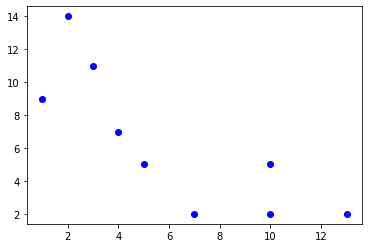

In [4]:
plt.scatter(x,y,label='data',color='blue');

In [5]:
# 3. Instanciar el modelo

from sklearn.linear_model import LinearRegression
regresion_lineal = LinearRegression()

In [6]:
# 4. Entrenar el modelo
regresion_lineal.fit(x.reshape(-1,1),y)

LinearRegression()

Parámetros calculados por la regresión:

In [7]:
print('m = ' + str(regresion_lineal.coef_) + ' b = ' + str(regresion_lineal.intercept_))

m = [-0.84253247] b = 11.482142857142856


In [8]:
# 5. Predecir
nuevo_x = np.array([4])
prediccion = regresion_lineal.predict(nuevo_x.reshape(-1,1))
print(prediccion)

[8.11201299]


In [9]:
# 6. Evaluar el modelo
import statsmodels.api as sm
reg_lin = sm.OLS(y, sm.add_constant(x)).fit()
print(reg_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     13.38
Date:                Fri, 30 Jul 2021   Prob (F-statistic):            0.00809
Time:                        07:44:03   Log-Likelihood:                -20.561
No. Observations:                   9   AIC:                             45.12
Df Residuals:                       7   BIC:                             45.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4821      1.670      6.877      0.0

C:\Users\usuario\anaconda3\envs\data science\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [10]:
# Error cuadrático medio
# RMSE

from sklearn.metrics import mean_squared_error
# Predecir
prediccion_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))

# Calcular el MSE
mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)

# La raíz cuadrada de MSE, que es el RMSE

rmse = np.sqrt(mse)

print('Error cuadrático medio (MSE) = '+str(mse))
print('RMSE = '+str(rmse))

Error cuadrático medio (MSE) = 5.647546897546897
RMSE = 2.376456794799118


## Supuestos de normalidad

1. Que el error se distribuye normal
2. Que no haya multicolinealidad (dependencia fuerte) entre los regresores
3. Homogeneidad de varianzas

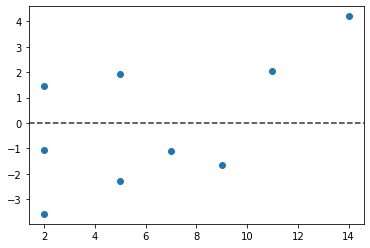

In [11]:
# Análisis gráfico de los errores

fig, ax = plt.subplots()
y_pred = reg_lin.predict(sm.add_constant(x))
ax.scatter(y , y - y_pred)
plt.axhline(y=0, color='black',alpha=0.8, linestyle = '--');

Interpretación del gráfico: En efecto los errores de la regresión parecen distribuirse de forma aleatoria alrededores del cero. Sin embargo, este es un problema sencillo en el que hay pocos puntos (datos) para llegar a esta conclusión. El test de Jarque-Bera (JB) también hace referencia a la distribución de los errores.

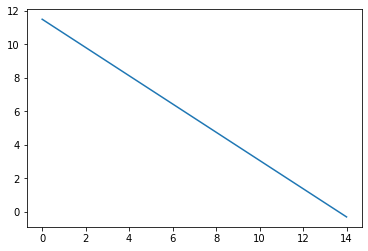

In [12]:
# Gráfico de la recta con los parámetros calculados
x = np.arange(0.0,15,1)
y = regresion_lineal.intercept_ + regresion_lineal.coef_*x
plt.plot(x,y);

## Aprendizaje Supervisado - Clasificación

Clasificación en Machine Learning consiste en aprender etiquetas discretas *y* a partir de un conjunto de características (features) *X* (que pueden ser uno, dos, o muchos más) tomando como muestra un conjunto de instancias.

### Ejemplo

Para un dataset de dos features y dos clases, vamos a clasificarlo usando el modelo de Árbol de Decisión.

#### Generación de los datos

Se va a generar automáticamente un grupo de 1000 instancias con features *x1* y *x2* - agrupados en una única variable `X`- a los cuales les vamos a asignar una etiqueta `y`, la cual puede valer 0 y 1. Esto se hará con la función `make_blobs` (Scikit-Learn). Adicional, se sugiere consultar la información sobre los datasets que ya vienen incorporados en Scikit-Learn [aquí](https://scikit-learn.org/stable/datasets/toy_dataset.html).

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
from sklearn.datasets import make_blobs

# Generación de los datos
# 1. Definir variables predictores y la variable a predecir
X, y = make_blobs(n_samples=1000, centers=2, random_state=0, cluster_std=1.3)

# 2. Separación de los datos
# En este ejemplo tampoco se hará separación de los datos. Pero se comenta porque es muy importante.

Ahora, las instancias generadas se grafican como puntos en el plano (x1,x2). Se asigna un color distinto según la etiqueta `y`:

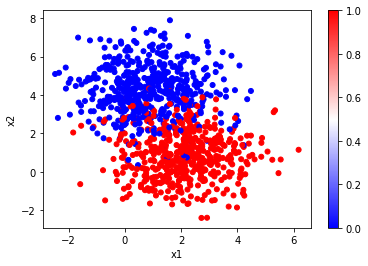

In [88]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='bwr')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#### Modelo de Árbol de decisión

El primer modelo de clasificación que vamos a utilizar es un Árbol de decisión. De forma introductoria considerar que es un objeto que, dadas varias instancias con un determinados grupo de features **X**, y unas determinadas etiquetas objetivo **y**, el árbol de desición aprende **automáticamente** reglas (de mayor a menor importancia) sobre cada feature. De esta forma decide qué etiqueta le corresponde a cada instancia.

In [89]:
# 3. Instanciar el modelo

from sklearn.tree import DecisionTreeClassifier

# Creación del objeto arbol
tree = DecisionTreeClassifier(max_depth=3, random_state = 42)

Una vez creado el modelo, hay que entrenarlo con los datos. Esto se hace con el método `fit()` que poseen todas las clases correspondientes a modelos de Scikit-Learn.

In [90]:
# 4. Entrenar el modelo
tree.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

Un modelo entrenado es una herramienta que, dadas ciertas características de una instancia - pares (*x1* y *x2*) - devuelve qué etiqueta *y* el modelo cree que le corresponde. Esto se hace con el método `predict()`, que también poseen todas las clases correspondientes a modelos de Scikit-Learn. Ejemplos para identificar algunas etiquetas:

Revisando instancias

In [91]:
# La instancia es el punto de coordenadas (x1,x2) que se va a evaluar

instancia = np.array([4,0])
instancia = instancia.reshape(1,-1)
y_pred = tree.predict(instancia)
print(y_pred)

# Tomando instancias al azar
np.random.seed(3)
n = 3
idxs = np.random.randint(X.shape[0], size=3)
instancias = X[idxs,:]
print(instancias)
y_pred = tree.predict(instancias)

[1]
[[1.24204338 2.18744154]
 [2.25133119 0.56555164]
 [2.36709476 1.10430994]]


In [92]:
# Comparativa de la etiqueta real con la predicción

for i,idx in enumerate(idxs):
    print(f'Instancia {idx}. Etiqueta real: {y[idx]}. Etiqueta predicha: {y_pred[i]}')

Instancia 874. Etiqueta real: 1. Etiqueta predicha: 0
Instancia 664. Etiqueta real: 1. Etiqueta predicha: 1
Instancia 249. Etiqueta real: 1. Etiqueta predicha: 1


In [93]:
# Revisión detallada de una instancia
k = 874
print(X[k,:])

[1.24204338 2.18744154]


In [94]:
# 5. Predicción
y_pred = tree.predict(instancias)
print(y_pred)

[0 1 1]


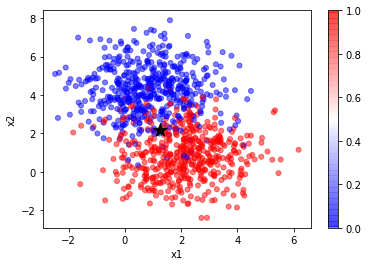

In [95]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='bwr', alpha = 0.5)
plt.colorbar()
plt.scatter(X[k, 0], X[k, 1], c = 'k', s=200, cmap='bwr', marker = '*')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Problema de clasificación: dadas características *x1* y *x2* de una instancia, qué etiqueta *y* (0: azul, 1: rojo) corresponde? Una forma de entender es que el clasificador *pinta* el plano *x1*,*x2* de acuerdo al color que cree que corresponde. Si hay regiones azules y regiones rojas, debe existir una frontera donde el color cambie.

In [96]:
def visualize_classifier(model, X, y, ax=None, cmap='bwr'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3, alpha = 0.5)
    ax.axis('tight')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
#     ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    

<ipython-input-96-5021ecd85820>:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


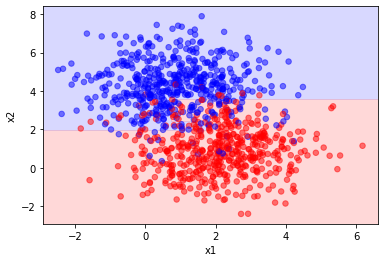

In [97]:
visualize_classifier(tree, X, y)

Los puntos (instancias) que queden sobre un fondo de su mismo color son aquellos que están bien clasificados por el modelo. En cambio, los puntos que quedan sobre un fondo de otro color, son puntos para los cuales el modelo está dando una etiqueta distinta a la etiqueta original de esa instancia.

¿Cuál es el porcentaje de instancias bien clasificadas por el modelo? Con la función `accuracy_score` se puede calcular el porcentaje de aciertos obtenidos al comparar la predicción `y_pred` contra la clase original `y`. Accuracy es una de las **métricas** utilizadas para evaluar modelos. Accuracy devuelve el porcentaje de aciertos.

In [98]:
# 6. Evaluar el modelo

from sklearn.metrics import accuracy_score

# Predicción sobre el dataset de entrenamieto
y_pred = tree.predict(X)

# Comparación con las etiquetas reales
accuracy_score(y_pred,y)

0.905

Esto quiere decir que el clasificador asigna la etiqueta correcta en el 90.5% de los casos.

Otra forma de ver los resultados de un clasificador es aa través de la **matriz de confusión**. La matriz de confusión es una tabla donde un eje corresponde a la etiqueta real y otro a la etiqueta predicha. En la diagonal se encuentran los aciertos. Por fuera de la diagonal aquellas instancias mal clasificadas.

In [99]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,y_pred))

[[439  61]
 [ 34 466]]


Una forma más interesante de ver esta información es con la función `plot_confusion_matrix`:

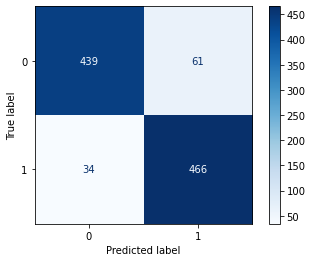

In [100]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree, X, y, cmap=plt.cm.Blues, values_format = '.0f')

O se puede obtener una versión **normalizada:**

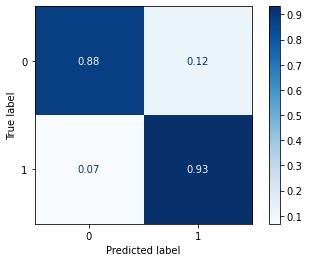

In [101]:
plot_confusion_matrix(tree, X, y, cmap=plt.cm.Blues, values_format = '.2f', normalize= 'true');

**Para profundizar**:
1. ¿Qué ocurre si se modifica el valor de `cluster_std` en la función `make_blobs`?¿En qué casos será más fácil - o difícil - la tarea de clasificación?
2. ¿Qué ocurre si se modifica el valor de `centers` en la función `make_blobs`?¿En qué cambia la formulación del problema de clasificación?

**Bonus:** se sugiere estudiar la maldición de la dimensión/dimensionalidad (curse of dimensionality).